### Stock Market Prediction And Forecasting Using Stacked LSTM

In [3]:
### Keras and Tensorflow >2.0


In [8]:
!pip install pandas-datareader

     -------------------------------------- 109.5/109.5 kB 6.6 MB/s eta 0:00:00


In [95]:
### Data Collection
import pandas_datareader as pdr
key="9b35c04d801a7169b1c763ad388867c3c5b2931c"

In [96]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\Shivendra\AppData\Local\Temp\ipykernel_35972\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [97]:
df.to_csv('AAPL.csv')

In [98]:
import pandas as pd

In [99]:
df=pd.read_csv('AAPL.csv')

In [100]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-08-26 00:00:00+00:00,206.49,207.19,205.06,205.86,26066130,49.954848,50.124194,49.608897,49.802436,104264520,0.0,1.0
1,AAPL,2019-08-27 00:00:00+00:00,204.16,208.55,203.53,207.86,25897344,49.391165,50.453211,49.238753,50.286283,103589376,0.0,1.0
2,AAPL,2019-08-28 00:00:00+00:00,205.53,205.72,203.32,204.10,15957632,49.722601,49.768566,49.187949,49.376650,63830528,0.0,1.0
3,AAPL,2019-08-29 00:00:00+00:00,209.01,209.32,206.66,208.50,21007652,50.564496,50.639492,49.995975,50.441115,84030608,0.0,1.0
4,AAPL,2019-08-30 00:00:00+00:00,208.74,210.45,207.20,210.16,21162561,50.499176,50.912866,50.126614,50.842708,84650244,0.0,1.0


In [101]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2024-08-15 00:00:00+00:00,224.72,225.3500,222.7600,224.60,46414013,224.72,225.3500,222.7600,224.60,46414013,0.0,1.0
1252,AAPL,2024-08-16 00:00:00+00:00,226.05,226.8271,223.6501,223.92,44340240,226.05,226.8271,223.6501,223.92,44340240,0.0,1.0
1253,AAPL,2024-08-19 00:00:00+00:00,225.89,225.9900,223.0400,225.72,40687813,225.89,225.9900,223.0400,225.72,40687813,0.0,1.0
1254,AAPL,2024-08-20 00:00:00+00:00,226.51,227.1700,225.4500,225.77,30299033,226.51,227.1700,225.4500,225.77,30299033,0.0,1.0
1255,AAPL,2024-08-21 00:00:00+00:00,226.40,227.9800,225.0500,226.52,34765480,226.40,227.9800,225.0500,226.52,34765480,0.0,1.0


In [102]:
df1=df.reset_index()['close']

In [103]:
df1

0       206.49
1       204.16
2       205.53
3       209.01
4       208.74
         ...  
1251    224.72
1252    226.05
1253    225.89
1254    226.51
1255    226.40
Name: close, Length: 1256, dtype: float64

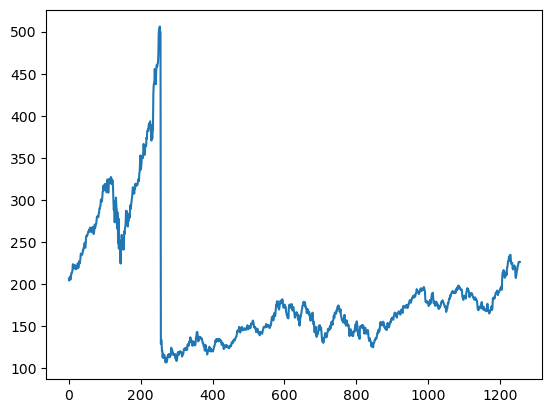

In [104]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [105]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [106]:
import numpy as np

In [107]:
df1

0       206.49
1       204.16
2       205.53
3       209.01
4       208.74
         ...  
1251    224.72
1252    226.05
1253    225.89
1254    226.51
1255    226.40
Name: close, Length: 1256, dtype: float64

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [109]:
print(df1)

[[0.24959299]
 [0.24375704]
 [0.24718848]
 ...
 [0.2981841 ]
 [0.29973701]
 [0.29946149]]


In [110]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [111]:
training_size,test_size

(816, 440)

In [112]:
train_data

array([[2.49592987e-01],
       [2.43757044e-01],
       [2.47188478e-01],
       [2.55904822e-01],
       [2.55228554e-01],
       [2.47614277e-01],
       [2.56355667e-01],
       [2.66599875e-01],
       [2.66549781e-01],
       [2.68829054e-01],
       [2.75165936e-01],
       [2.92423294e-01],
       [2.91170946e-01],
       [2.80300564e-01],
       [2.83180964e-01],
       [2.85184721e-01],
       [2.90369443e-01],
       [2.85835942e-01],
       [2.77745773e-01],
       [2.80225423e-01],
       [2.77620539e-01],
       [2.86011271e-01],
       [2.83155917e-01],
       [2.80475892e-01],
       [2.93375078e-01],
       [2.94927990e-01],
       [2.80826550e-01],
       [2.85485285e-01],
       [3.00989355e-01],
       [3.01114590e-01],
       [2.94452098e-01],
       [3.01039449e-01],
       [3.08703820e-01],
       [3.24032561e-01],
       [3.23180964e-01],
       [3.21803381e-01],
       [3.19423920e-01],
       [3.21703193e-01],
       [3.24533500e-01],
       [3.34802755e-01],


In [113]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [114]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [115]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [116]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [117]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [118]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [119]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 14s 397ms/step - loss: 0.0357 - val_loss: 7.4153e-04
Epoch 2/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0133 - val_loss: 0.0023
Epoch 3/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0121 - val_loss: 9.2007e-04
Epoch 4/100
12/12 [==============================] - 3s 228ms/step - loss: 0.0085 - val_loss: 3.2359e-04
Epoch 5/100
12/12 [==============================] - 3s 233ms/step - loss: 0.0075 - val_loss: 3.8195e-04
Epoch 6/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0063 - val_loss: 0.0022
Epoch 7/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0090 - val_loss: 0.0018
Epoch 8/100
12/12 [==============================] - 3s 231ms/step - loss: 0.0064 - val_loss: 7.2221e-04
Epoch 9/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0056 - val_loss: 5.7799e-04
Epoch 10/100
12/12 [==============================] - 3s 234ms/ste

12/12 [==============================] - 3s 240ms/step - loss: 0.0013 - val_loss: 1.8162e-04
Epoch 79/100
12/12 [==============================] - 3s 233ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 80/100
12/12 [==============================] - 3s 230ms/step - loss: 0.0040 - val_loss: 0.0012
Epoch 81/100
12/12 [==============================] - 3s 235ms/step - loss: 0.0040 - val_loss: 7.1816e-04
Epoch 82/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0031 - val_loss: 4.7148e-04
Epoch 83/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0053 - val_loss: 0.0011
Epoch 84/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0028 - val_loss: 3.2771e-04
Epoch 85/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0021 - val_loss: 1.6502e-04
Epoch 86/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0019 - val_loss: 1.7864e-04
Epoch 87/100
12/12 [==============================] - 3s 233ms/step - l

In [123]:
import tensorflow as tf

In [124]:
tf.__version__

'2.10.1'

In [125]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 45ms/step


In [126]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [127]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

206.30059729157898

In [128]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

187.05451392369397

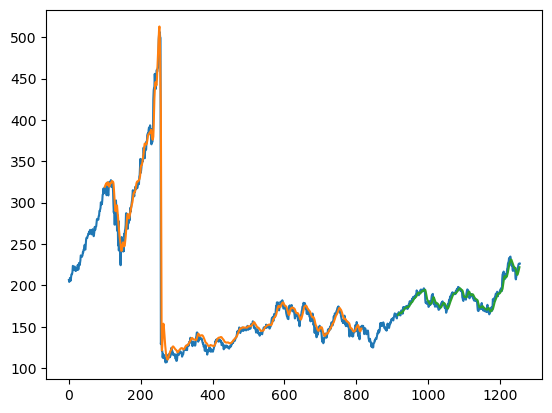

In [129]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [130]:
len(test_data)

440

In [131]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [132]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [133]:
temp_input

[0.1552911709455228,
 0.1573199749530369,
 0.1552410770194113,
 0.1571446462116468,
 0.1543143393863493,
 0.15737006887914834,
 0.1526361928616155,
 0.1708202880400751,
 0.17460237946149026,
 0.16493425172197868,
 0.1566437069505322,
 0.15318722604884155,
 0.1507827175954915,
 0.1456731371321227,
 0.14777708202880396,
 0.15043206011271132,
 0.15574201628052597,
 0.15792110206637439,
 0.1564433312460864,
 0.16696305572949277,
 0.15902316844082653,
 0.1564433312460864,
 0.16578584846587346,
 0.19170945522855348,
 0.1875266123982467,
 0.189254852849092,
 0.19010644959298684,
 0.1946900438321853,
 0.19088290544771447,
 0.19897307451471502,
 0.20185347526612396,
 0.207589229805886,
 0.20788979336255475,
 0.20796493425172197,
 0.2108954289292423,
 0.21417658108954285,
 0.2105447714464621,
 0.2004758922980588,
 0.20824045084533493,
 0.2082654978083907,
 0.20901690670006257,
 0.2115216030056355,
 0.21392611145898555,
 0.2183844708829054,
 0.2191859737006887,
 0.22299311208515965,
 0.2195115842

In [135]:
from numpy import array
import numpy as np

lst_output = []
i = 0
n_steps = len(temp_input)  # Dynamically use available data length as steps

while i < 30:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])  # Use the last 'n_steps' elements
        print(f"{i} day input {x_input}")
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print(f"{i} day output {yhat}")
        
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]  # Remove the oldest element to maintain input length
        
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


[0.29425806]
100
1 day input [0.15731997 0.15524108 0.15714465 0.15431434 0.15737007 0.15263619
 0.17082029 0.17460238 0.16493425 0.15664371 0.15318723 0.15078272
 0.14567314 0.14777708 0.15043206 0.15574202 0.1579211  0.15644333
 0.16696306 0.15902317 0.15644333 0.16578585 0.19170946 0.18752661
 0.18925485 0.19010645 0.19469004 0.19088291 0.19897307 0.20185348
 0.20758923 0.20788979 0.20796493 0.21089543 0.21417658 0.21054477
 0.20047589 0.20824045 0.2082655  0.20901691 0.2115216  0.21392611
 0.21838447 0.21918597 0.22299311 0.21951158 0.2255479  0.2161052
 0.25124609 0.26607389 0.26900438 0.26462116 0.2750908  0.26912962
 0.25758297 0.25209768 0.25372574 0.2560551  0.26652473 0.26865373
 0.25993738 0.27529117 0.2841077  0.28731371 0.29931121 0.30301816
 0.3051722  0.31594239 0.30239198 0.30983093 0.31949906 0.32055103
 0.30567314 0.29390106 0.29422668 0.29335003 0.29597996 0.27977458
 0.27714465 0.27832185 0.27902317 0.2804258  0.2886412  0.27932373
 0.28308078 0.25655604 0.25144646 

8 day output [[0.29909995]]
9 day input [0.16493425 0.15664371 0.15318723 0.15078272 0.14567314 0.14777708
 0.15043206 0.15574202 0.1579211  0.15644333 0.16696306 0.15902317
 0.15644333 0.16578585 0.19170946 0.18752661 0.18925485 0.19010645
 0.19469004 0.19088291 0.19897307 0.20185348 0.20758923 0.20788979
 0.20796493 0.21089543 0.21417658 0.21054477 0.20047589 0.20824045
 0.2082655  0.20901691 0.2115216  0.21392611 0.21838447 0.21918597
 0.22299311 0.21951158 0.2255479  0.2161052  0.25124609 0.26607389
 0.26900438 0.26462116 0.2750908  0.26912962 0.25758297 0.25209768
 0.25372574 0.2560551  0.26652473 0.26865373 0.25993738 0.27529117
 0.2841077  0.28731371 0.29931121 0.30301816 0.3051722  0.31594239
 0.30239198 0.30983093 0.31949906 0.32055103 0.30567314 0.29390106
 0.29422668 0.29335003 0.29597996 0.27977458 0.27714465 0.27832185
 0.27902317 0.2804258  0.2886412  0.27932373 0.28308078 0.25655604
 0.25144646 0.25793363 0.26667502 0.27401378 0.27724483 0.2866124
 0.28773951 0.2952536  

17 day output [[0.30548024]]
18 day input [0.15644333 0.16696306 0.15902317 0.15644333 0.16578585 0.19170946
 0.18752661 0.18925485 0.19010645 0.19469004 0.19088291 0.19897307
 0.20185348 0.20758923 0.20788979 0.20796493 0.21089543 0.21417658
 0.21054477 0.20047589 0.20824045 0.2082655  0.20901691 0.2115216
 0.21392611 0.21838447 0.21918597 0.22299311 0.21951158 0.2255479
 0.2161052  0.25124609 0.26607389 0.26900438 0.26462116 0.2750908
 0.26912962 0.25758297 0.25209768 0.25372574 0.2560551  0.26652473
 0.26865373 0.25993738 0.27529117 0.2841077  0.28731371 0.29931121
 0.30301816 0.3051722  0.31594239 0.30239198 0.30983093 0.31949906
 0.32055103 0.30567314 0.29390106 0.29422668 0.29335003 0.29597996
 0.27977458 0.27714465 0.27832185 0.27902317 0.2804258  0.2886412
 0.27932373 0.28308078 0.25655604 0.25144646 0.25793363 0.26667502
 0.27401378 0.27724483 0.2866124  0.28773951 0.2952536  0.29858485
 0.2981841  0.29973701 0.29946149 0.29425806 0.29537272 0.2957204
 0.29584759 0.2960704  0.

25 day output [[0.30769253]]
26 day input [0.19010645 0.19469004 0.19088291 0.19897307 0.20185348 0.20758923
 0.20788979 0.20796493 0.21089543 0.21417658 0.21054477 0.20047589
 0.20824045 0.2082655  0.20901691 0.2115216  0.21392611 0.21838447
 0.21918597 0.22299311 0.21951158 0.2255479  0.2161052  0.25124609
 0.26607389 0.26900438 0.26462116 0.2750908  0.26912962 0.25758297
 0.25209768 0.25372574 0.2560551  0.26652473 0.26865373 0.25993738
 0.27529117 0.2841077  0.28731371 0.29931121 0.30301816 0.3051722
 0.31594239 0.30239198 0.30983093 0.31949906 0.32055103 0.30567314
 0.29390106 0.29422668 0.29335003 0.29597996 0.27977458 0.27714465
 0.27832185 0.27902317 0.2804258  0.2886412  0.27932373 0.28308078
 0.25655604 0.25144646 0.25793363 0.26667502 0.27401378 0.27724483
 0.2866124  0.28773951 0.2952536  0.29858485 0.2981841  0.29973701
 0.29946149 0.29425806 0.29537272 0.2957204  0.29584759 0.2960704
 0.29651755 0.29720449 0.29808819 0.29909995 0.3001653  0.30121511
 0.30219302 0.30305904

In [136]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [137]:
import matplotlib.pyplot as plt

In [138]:
len(df1)

1256

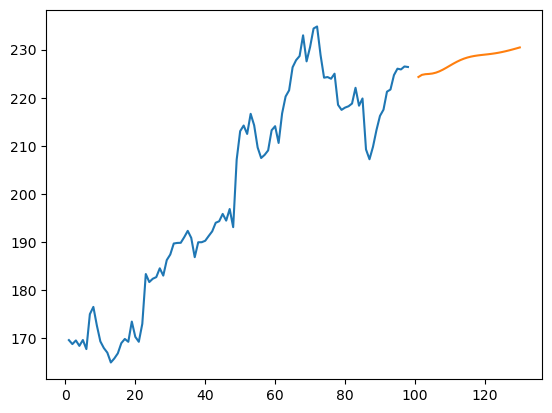

In [140]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

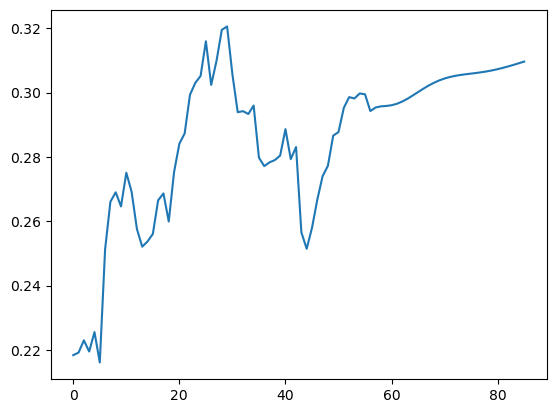

In [141]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [142]:
df3=scaler.inverse_transform(df3).tolist()

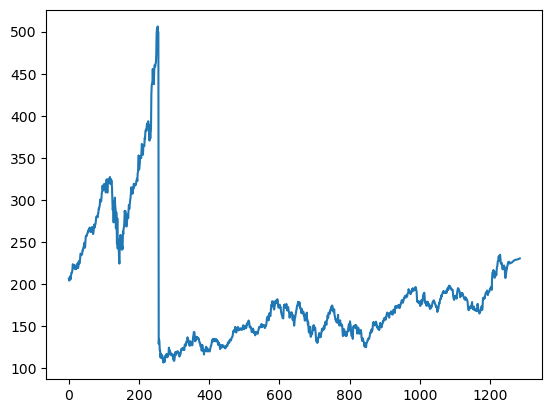

In [143]:
plt.plot(df3)